<a href="https://colab.research.google.com/github/hectorcamachoz/TallerRedesNeuronales/blob/main/TallerRedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller Redes Neuronales

El objetivo es realizar una red neuronal que detecte un numero en imagenes.

**1.** Importare las librerias a utilizar, y la base de datos.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**2.** Mostrare el tamaño de train y test.

In [26]:
print(f"Training images shapes: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")

Training images shapes: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


Tenemos en train 60000 imagenes de tamaño 28x28 pixeles, y en test se tienen 10000 imagenes, de tamaño 28x28 pixeles.

**3.** A continuacion mostrare algunas imagenes de train, para revisar si se importaron de manera correcta.

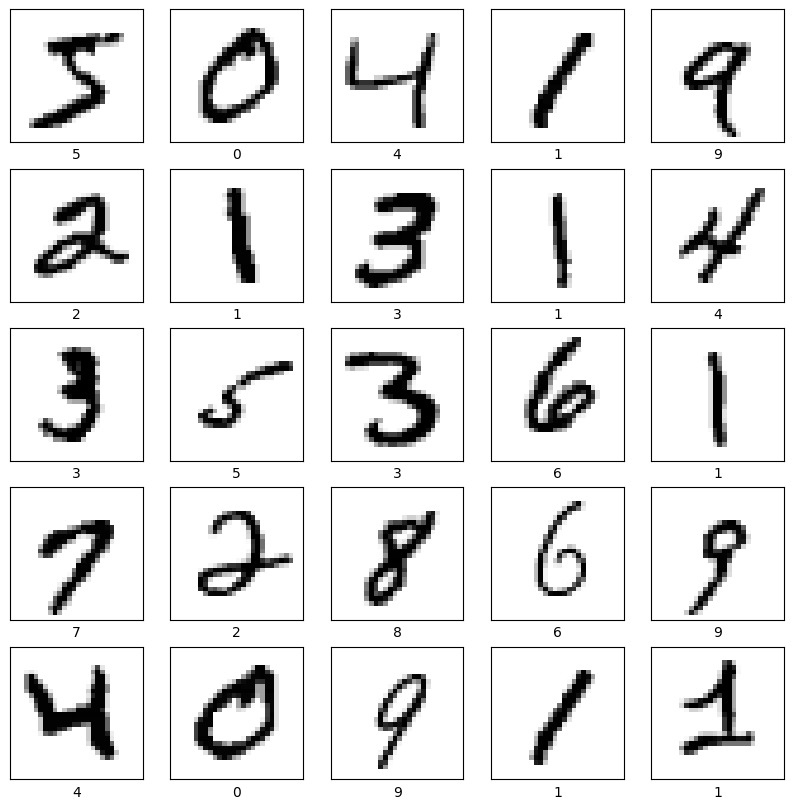

In [27]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


**4.** Revisare la proporcion de las clases en train y test.

In [28]:
import numpy as np

unique_train, counts_train = np.unique(train_labels, return_counts=True)
proportion_train = counts_train / len(train_labels)

unique_test, counts_test = np.unique(test_labels, return_counts=True)
proportion_test = counts_test / len(test_labels)

print("Proportion of classes in training set:")
for i in range(len(unique_train)):
    print(f"Class {unique_train[i]}: {proportion_train[i]:.4f}")

print("\nProportion of classes in test set:")
for i in range(len(unique_test)):
    print(f"Class {unique_test[i]}: {proportion_test[i]:.4f}")


Proportion of classes in training set:
Class 0: 0.0987
Class 1: 0.1124
Class 2: 0.0993
Class 3: 0.1022
Class 4: 0.0974
Class 5: 0.0903
Class 6: 0.0986
Class 7: 0.1044
Class 8: 0.0975
Class 9: 0.0992

Proportion of classes in test set:
Class 0: 0.0980
Class 1: 0.1135
Class 2: 0.1032
Class 3: 0.1010
Class 4: 0.0982
Class 5: 0.0892
Class 6: 0.0958
Class 7: 0.1028
Class 8: 0.0974
Class 9: 0.1009


Se puede observar que la proporcion de las clases es aproximadamente igual en todas.

**5.** Por ultimo, en esta etapa de exploracion de datos, mostrare el valor maximo de pixel, y el minimo.

In [29]:
print(f"Min pixel value in training set: {np.min(train_images)}")
print(f"Max pixel value in training set: {np.max(train_images)}")

Min pixel value in training set: 0
Max pixel value in training set: 255


Se puede concluir que son imagenes de 8 bits.

**6.** A continuacion se creara el modelo sequencial, y se agregara la primera capa.

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
# Primera Capa, tamaño de imagen de entrada.
model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**7.** Agregare las capas ocultas, con parametros aleatorios.

In [31]:
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,890 (956.60 KB)

 Trainable params: 244,890 (956.60 KB)

 Non-trainable params: 0 (0.00 B)

**8.** Se le agregara un EarlyStopping, para parar el entranamiento cuando ya no haya mejoras en el loss.

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights = True)


**9.** Entrenare un modelo con 50 epocas, y utilizando el callback.

In [33]:
history = model.fit(train_images,
                    train_labels,
                    epochs=50,
                    validation_split = 0.4,
                    batch_size = 32,
                    callbacks = [early_stop])

Epoch 1/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5454 - loss: 2.0456 - val_accuracy: 0.8658 - val_loss: 0.5776
Epoch 2/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9147 - loss: 0.3991 - val_accuracy: 0.9343 - val_loss: 0.2563
Epoch 3/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9442 - loss: 0.1980 - val_accuracy: 0.9418 - val_loss: 0.2295
Epoch 4/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9603 - loss: 0.1375 - val_accuracy: 0.9526 - val_loss: 0.1808
Epoch 5/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9707 - loss: 0.1058 - val_accuracy: 0.9634 - val_loss: 0.1475
Epoch 6/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9752 - loss: 0.0855 - val_accuracy: 0.9544 - val_loss: 0.1891
Epoch 7/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9764 - loss: 0.0823 - val_accuracy: 0.9598 - val_loss: 0.1728
Epoch 8/50
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9798 - loss: 0.0730 -

Se entrenaron 13 epocas de 50, el mejor resultado lo presento en la epoca 9, ya que presento un val_loss de 0.1333 y un val_accuracy de 0.967
**10.** Se graficara el accuracy de entranmiento y del entrenamiento validacion.

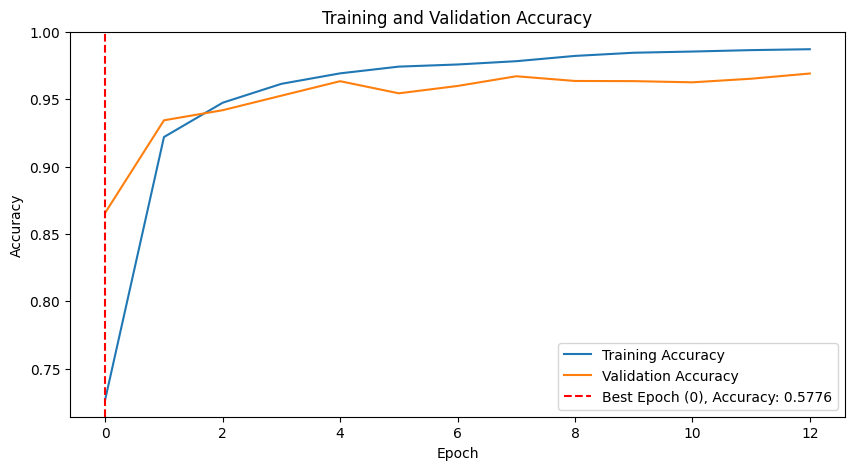

In [34]:
# prompt: graph the results of the model, and graph a vertical line on the epoch with better results

import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')

# Find the epoch with the best validation accuracy
best_epoch = np.argmax(history.history['val_loss'])
best_val_accuracy = np.max(history.history['val_loss'])

# Add a vertical line at the best epoch
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Epoch ({best_epoch}), Accuracy: {best_val_accuracy:.4f}')

plt.legend()
plt.show()


In [35]:
model.save("modelo_tallerRedesNeuronales.h5")